## Medical Insurance Cost Prediction Using Machine Learning Models.

### Abstract

##### The aim of this project is to develop a machine learning model that predicts the cost of medical insurance for individuals based on various demographic and health-related factors. Accurate prediction of medical insurance costs can help insurance providers and individuals make informed decisions regarding coverage and financial planning. The model utilizes historical data on individuals' attributes such as age, gender, BMI, smoking habits, region, and number of dependents to train and predict the future medical insurance cost.

### Introduction

#### This project aims to develop a machine learning model that predicts insurance charges based on individual attributes such as age, BMI, smoking habits, and region. By accurately estimating insurance charges, insurance companies can make informed decisions, improve risk assessment, and provide personalized insurance quotes to customers. The project utilizes a dataset containing relevant information and follows a standard machine learning workflow, including data preprocessing, feature selection/engineering, model training, evaluation, and fine-tuning. The ultimate goal is to enhance pricing accuracy, fairness, and customer satisfaction in the insurance industry.

### Problem Statement


#### Insurance companies often struggle with determining appropriate insurance charges for their customers. Manual calculations may not account for the complexity of various factors affecting insurance costs, leading to potential inaccuracies and unfair pricing. This project aims to develop a predictive model that leverages machine learning techniques to accurately estimate insurance charges based on individual attributes.

### Model selection

#### Various machine learning algorithms, such as linear regression, decision trees, random forests, or gradient boosting, will be explored to identify the most suitable model for insurance charge prediction. The model will be selected based on its ability to handle the specific characteristics of the dataset and its performance metrics.

####  Tools
- Numpy
- Pandas
- Matplotlib
- Seaborn
- Scikit learn


#### Project overview
- Importing libraries
- Reading csv file
- Data cleaning
- Data visualizatiion
- Creation of model
- conclusion

##### Dataset source - Kaggle

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [2]:
df=pd.read_csv('insurance1.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Finding out how many rows and columns present in the dataset

In [4]:
df.shape

(1338, 7)

### Showing all the columns headings in the dataset

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Datatypes of corresponding columns

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Showing informations about all the features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Categorical Features:
Sex,Smoker,Region


### Checking null values for each column

In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Checking for duplicated values

In [10]:
df.duplicated().sum()

1

### Dropping duplicated values

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Data Analysis

#### Statistical Measures of the dataset

In [15]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Correlation

In [16]:
correlation_matrix = df.corr()

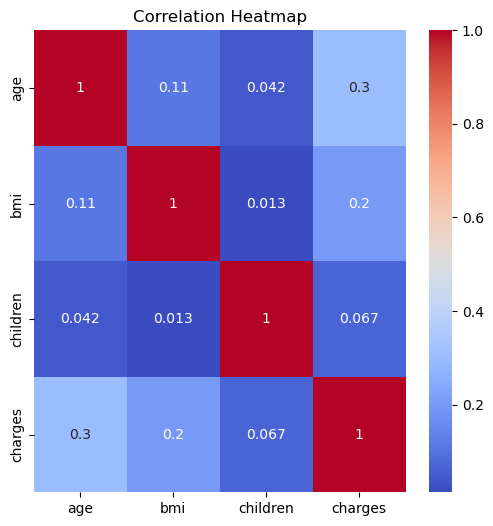

In [17]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

### Distribution of age values

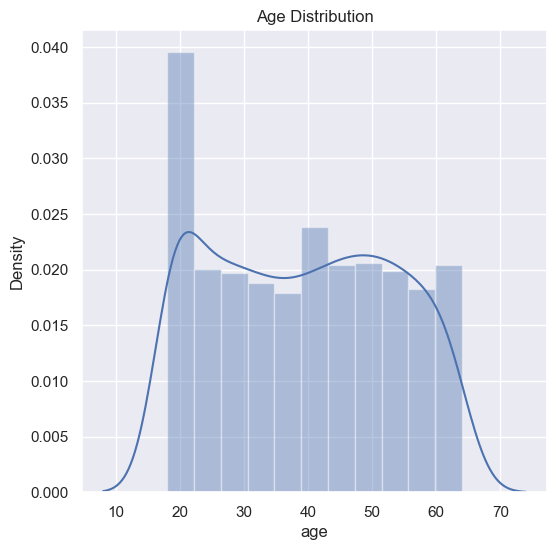

In [18]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

#### From this distribution we can conclude that most of the persons are of age between 18 to 23 and we have normal distributon from age 25 to 65.

### Distribution of Gender 

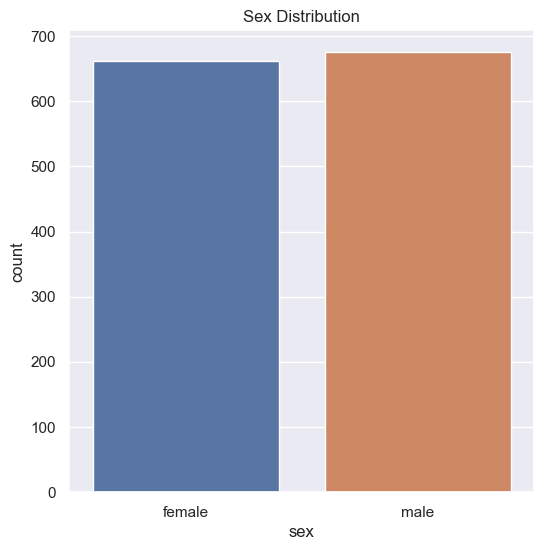

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

In [20]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

#### Distribution of gender is almost equal

### BMI Distribution

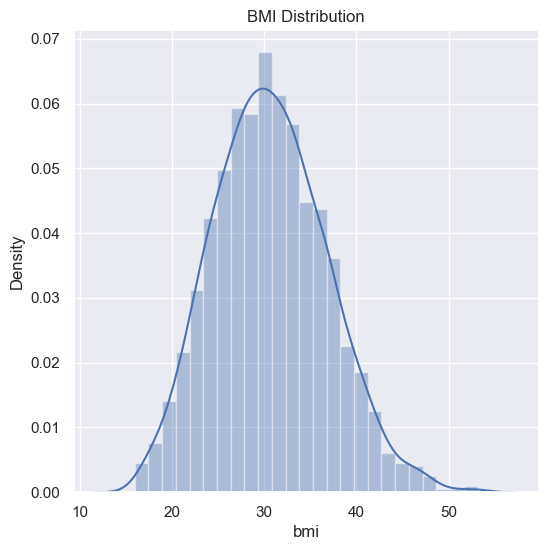

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

#### BMI has a normal distribution. A lot of people in this particular dataset is over weighted.

### Childern column

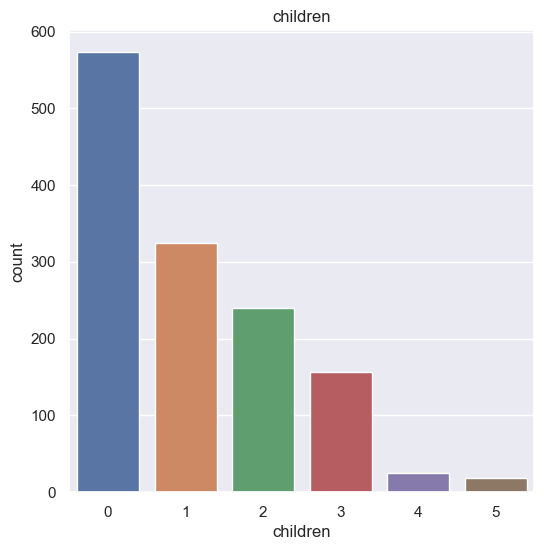

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('children')
plt.show()

In [23]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

#### More number of people who does not have any children.

### Smoker column

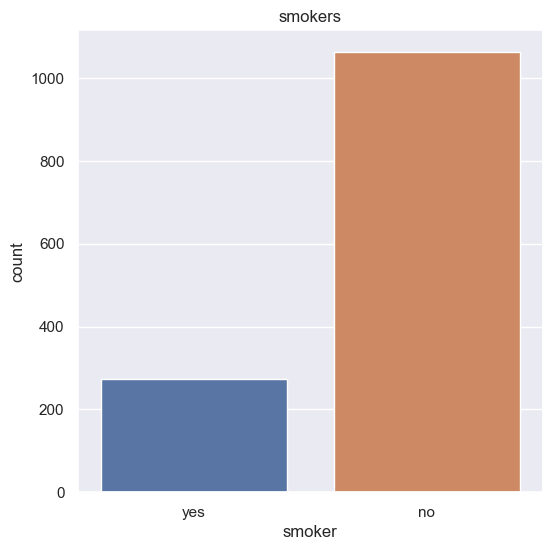

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smokers')
plt.show()

In [25]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

#### Most of the people are non smokers

### Region column

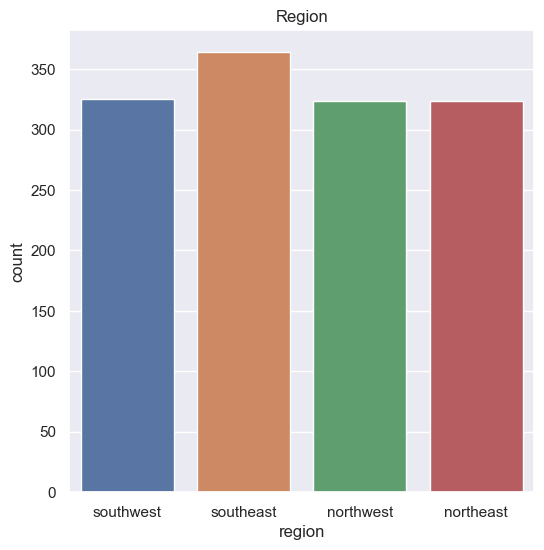

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

In [27]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

#### Data is almost similar for all regions, a little bit more for southeast.

### Distribution of charges

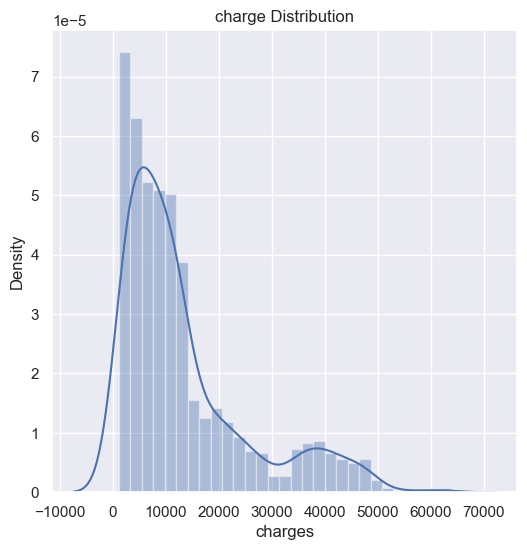

In [28]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title("charge Distribution")
plt.show()

#### Most of the charges are distributed in the 10000 dollars mark.

### Data pre-processing

#### Encoding the categorical features

##### Encoding sex column

In [29]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

##### Encoding smoker column

In [30]:
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

##### Encoding Region column

In [31]:
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [32]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


### Splitting Features and Target 

In [33]:
x=df.drop(columns='charges',axis=1)

In [34]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [35]:
y=df['charges']

In [36]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [37]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1337 rows x 6 columns]


In [38]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


### Splitting the data into training data and testing data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

#### Shape of the test and train data.

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 6)
(268, 6)
(1069,)
(268,)


### Model Training

#### 1. Linear Regression Model

##### Importing Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model=LinearRegression()

In [44]:
model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred=model.predict(x_test)

### Model Evaulation

##### Checking the score

In [46]:
model.score(x_train,y_train) 

0.7584123253312958

In [47]:
model.score(x_test,y_test)

0.7150366419551837

##### R squared value

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2=r2_score(y_test, y_pred)*100

In [50]:
r2

71.50366419551837

#### 2.Random ForestRegressor

In [51]:
 from sklearn.ensemble import RandomForestRegressor

In [52]:
regr = RandomForestRegressor()

In [53]:
regr.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
y_pred=regr.predict(x_test)

##### Checking the score

In [55]:
regr.score(x_train,y_train)

0.9776074279181237

In [56]:
regr.score(x_test,y_test)

0.8339292060209827

##### R squared value

In [57]:
r21=r2_score(y_test, y_pred)*100

In [58]:
r21

83.39292060209827

##### R squared value

In [59]:
r22=r2_score(y_test, y_pred)*100

In [60]:
r22

83.39292060209827

#### 3.Gradient BoostingRegressor

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
reg = GradientBoostingRegressor()

In [63]:
reg.fit(x_train,y_train)

GradientBoostingRegressor()

In [64]:
y_pred =reg.predict(x_test)

##### Checking the score

In [65]:
reg.score(x_train,y_train)*100

91.12310331118309

In [66]:
reg.score(x_test,y_test)*100

85.41167175124752

##### R squared value

In [67]:
r23=r2_score(y_test, y_pred)*100

In [68]:
r23

85.41167175124752

#### 4. Extra TreeRegressor

In [69]:
from sklearn.ensemble import ExtraTreesRegressor

In [70]:
regrr = ExtraTreesRegressor()

In [71]:
regrr.fit(x_train,y_train)

ExtraTreesRegressor()

#### Checking the score

In [72]:
regrr.score(x_train,y_train)*100

100.0

In [73]:
regrr.score(x_test,y_test)*100

81.93650831614318

#### R square value

In [74]:
r234=r2_score(y_test, y_pred)*100

In [75]:
r234 

85.41167175124752

### Finding the best model

In [76]:
results = pd.DataFrame({'Model': [ 'Linear Regression', 'Random Forest Regressor', 
                                  ' Gradient Boosting Regressor','Extra Tree Regressor'],'Score': [ r2,r22,r23 ,r234]})
output_df = results.sort_values(by='Score', ascending=False)
output_df = output_df.reset_index(drop=True)
output_df

,Model,Score
0,Gradient Boosting Regressor,85.411672
1,Extra Tree Regressor,85.411672
2,Random Forest Regressor,83.392921
3,Linear Regression,71.503664


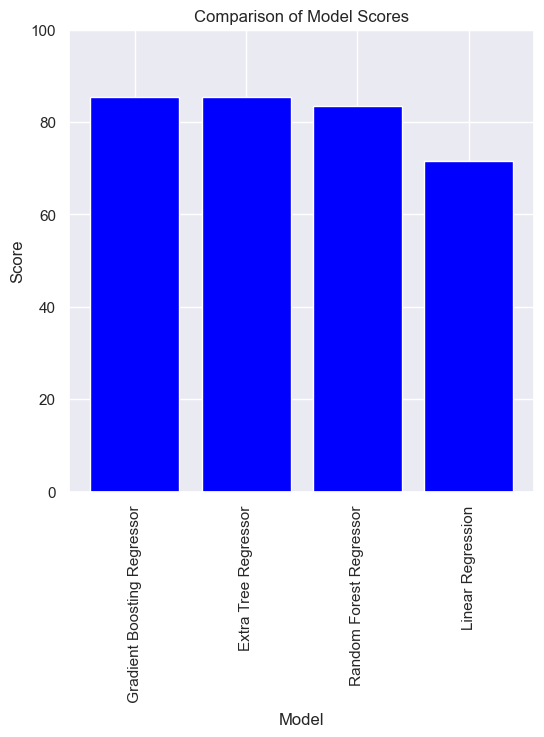

In [77]:
plt.figure(figsize=(6,6))
plt.bar(output_df['Model'], output_df['Score'], color='blue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Scores')
plt.ylim(0, 100) 
plt.xticks(rotation=90)
plt.show()

### conclusion

#### - The Gradient Boosting Regressor and Extra Tree Regressor are the top-performing models among the options listed. Both models achieved a score of 85.411672, indicating a high level of accuracy in the regression task.

#### - The Random Forest Regressor, with a score of 83.392921, also performed well but slightly lower than the top two models. It can still be considered a viable option, especially if the performance difference is negligible or if other factors such as interpretability or model complexity are taken into account.

#### - On the other hand, the Linear Regression model obtained the lowest score of 71.503664, suggesting lower accuracy compared to the other models. While Linear Regression can be a simple and interpretable baseline, it may not be the best choice for this specific task, given the available alternatives.